# DeepLearning method for credit card fraud detection.
* In this notebook, I will explore CNN and LSTM method for the fraud detection.

In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

2022-10-08 14:26:48.498311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# The following import and function call are the only additions to code required
# to automatically log metrics and parameters to MLflow.
import mlflow.keras

mlflow.keras.autolog()

/Users/michael/opt/anaconda3/envs/anomaly/lib/python3.9/site-packages/mlflow/utils/autologging_utils/__init__.py:416: FutureWarning: Autologging support for keras >= 2.6.0 has been deprecated and will be removed in a future MLflow release. Use `mlflow.tensorflow.autolog()` instead.
  return _autolog(*args, **kwargs)


In [3]:
# load file
filepath = "../Data/creditcard.csv"
df = pd.read_csv(filepath)

In [4]:
# identify X features, and y class
# Those data have been used froom creditCard notbook, EDA
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state = 43)

In [5]:
# balanced class with sklearn compute class weight
from sklearn.utils import compute_class_weight

cw = compute_class_weight(class_weight ="balanced", classes =np.unique(y_train), y = y_train)
classweight = dict(zip(np.unique(y_train), cw))

In [6]:
# Normalize data, scale to [0,1]
#train_data = StandardScaler().fit_transform(X_train)
#test_data = StandardScaler().fit_transform(X_test)
train_data = MinMaxScaler().fit_transform(X_train)
test_data = MinMaxScaler().fit_transform(X_test)
train_labels = y_train
test_labels = y_test

In [7]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [8]:
print(train_labels.shape)
print(train_data.shape)
print(test_data.shape)

(185124,)
(185124, 30)
(99683, 30)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape(([30,1,1]),input_shape=[30]),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    #layers.Dense(32, activation='relu'),
    layers.Flatten(),
    #layers.Dense(32, activation='relu'),
    
    layers.Dense(1, activation="sigmoid"),
    ])


2022-10-08 14:26:55.747879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 30, 1, 1)          0         
                                                                 
 conv2d (Conv2D)             (None, 30, 1, 64)         640       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 1, 32)         18464     
                                                                 
 dense (Dense)               (None, 30, 1, 64)         2112      
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1921      
                                                                 
Total params: 23,137
Trainable params: 23,137
Non-traina

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss=tf.keras.losses.BinaryCrossentropy(),metrics=['binary_accuracy'])
    #metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [12]:
import os
checkpoint_path = "../model/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [13]:
history = model.fit(train_data, train_labels, 
          epochs=10, 
        class_weight=classweight,
          batch_size=128,
          validation_data=(test_data, test_labels),
          shuffle=False, callbacks=[cp_callback])
          

2022/10/08 14:26:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '51070719b7204d9cb43d963d10e11ae5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/10
1445/1447 [============================>.] - ETA: 0s - loss: 0.3821 - binary_accuracy: 0.9639
Epoch 1: saving model to ../model/training_1/cp.ckpt
1447/1447 [==============================] - 21s 14ms/step - loss: 0.3818 - binary_accuracy: 0.9639 - val_loss: 0.0113 - val_binary_accuracy: 0.9987
Epoch 2/10
1446/1447 [============================>.] - ETA: 0s - loss: 0.2635 - binary_accuracy: 0.9678
Epoch 2: saving model to ../model/training_1/cp.ckpt
1447/1447 [==============================] - 18s 13ms/step - loss: 0.2635 - binary_accuracy: 0.9678 - val_loss: 0.0107 - val_binary_accuracy: 0.9987
Epoch 3/10
1445/1447 [============================>.] - ETA: 0s - loss: 0.2347 - binary_accuracy: 0.9667
Epoch 3: saving model to ../model/training_1/cp.ckpt
1447/1447 [==============================] - 19s 13ms/step - loss: 0.2345 - binary_accuracy: 0.9667 - val_loss: 0.0070 - val_binary_accuracy: 0.9988
Epoch 4/10
1443/1447 [============================>.] - ETA: 0s - loss: 0.2159 

INFO:tensorflow:Assets written to: /var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/tmp8au3c0d2/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/tmp8au3c0d2/model/data/model/assets
/Users/michael/opt/anaconda3/envs/anomaly/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [14]:
model.save('../model/model_v5.h5')

In [15]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc, precision, recall:", results)

779/779 [==============================] - 3s 4ms/step - loss: 904.5264 - binary_accuracy: 0.9982
test loss, test acc, precision, recall: [904.5263671875, 0.9982042908668518]


Dense layer training result


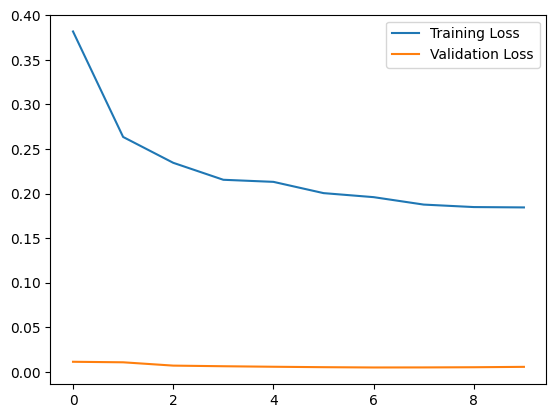

In [16]:
print('Dense layer training result')
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [17]:
preds = model.predict(test_data)
preds = (preds>0.5)
print("Deep learning Conv2D layer only confusion matrix")
tf.math.confusion_matrix(
    test_labels,
    preds,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

3116/3116 [==============================] - 5s 2ms/step
Deep learning Conv2D layer only confusion matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99485,    19],
       [   88,    91]], dtype=int32)>

In [18]:
m = test_labels.to_numpy()
p = preds.flatten()
c = np.logical_and(p, m)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(m, p)

array([[99485,    19],
       [   88,    91]])

In [20]:
# display all true value's index
[i for i, x in enumerate(p) if x]

[934,
 2034,
 2109,
 3274,
 6664,
 6741,
 6804,
 7261,
 7551,
 7694,
 7941,
 8033,
 8791,
 9560,
 9869,
 10415,
 10469,
 10964,
 11640,
 12361,
 12548,
 12705,
 13984,
 14211,
 14702,
 15337,
 15355,
 15764,
 16165,
 18539,
 20244,
 20526,
 21098,
 23020,
 25156,
 25231,
 25324,
 27587,
 27728,
 27850,
 28205,
 31439,
 31903,
 32117,
 32291,
 34122,
 34193,
 34503,
 38229,
 39327,
 40887,
 40962,
 43038,
 44491,
 45369,
 45607,
 46543,
 46868,
 47336,
 48599,
 50196,
 54124,
 54143,
 55527,
 56534,
 58304,
 58341,
 59361,
 59955,
 60751,
 60794,
 62004,
 62157,
 62914,
 63230,
 63371,
 63849,
 65899,
 69577,
 69810,
 72694,
 75338,
 75524,
 75797,
 76233,
 76321,
 81492,
 83102,
 83241,
 83469,
 83895,
 85046,
 85860,
 85940,
 86229,
 86681,
 87338,
 88053,
 88763,
 89560,
 90427,
 90913,
 91477,
 91843,
 93458,
 93620,
 94020,
 94156,
 94399,
 98359]

In [21]:
#new = tf.keras.models.load_model('../model/model_v1.h5')
#new.summary()